In [52]:
import random
import pandas as pd
import scipy.stats
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [45]:
def auction(rule, user_bid, bids):
    print(bids, type(bids))
    print(user_bid, type(user_bid))
    
    # Introduce heterogeneous "objective" values for each auction
    # Vary agents' bids as a percent of each "objective" value
    glob_value = random.randint(3000,10000)
    user_bid_adj = (round(user_bid[0] * glob_value /100), user_bid[1])
    bids_adj = []
    for bid in bids:
        bids_adj = bids_adj + [((round(bid[0] * glob_value /100), bid[1]))]
        
    # Add user bid to agents bids   
    final_bid_list = bids_adj + [(user_bid_adj)]
    print(type(final_bid_list))
    print(final_bid_list)
    
    # Rank bids from highest to lowest
    bid_rank = sorted(final_bid_list, key = lambda tup: tup[0], reverse=True)
    print("bid rank")
    print(bid_rank)
    
    # Develop auction rules
    
    # Vickrey Second-Price Auction
    if rule == 'second price':
        bidder = bid_rank[0][1]
        price = bid_rank[1][0]
        
    # Percentage based rule, unless 2nd price greater than outcome
    elif type(rule) == int:
        bidder = bid_rank[0][1]
        if bid_rank[1][0] > (rule * bid_rank[0][0]):
            price = bid_rank[1][0]
        else:
            price = round(bid_rank[0][0] * (float(rule)) /100)
            
        
        
    # Sets a soft floor reserve price, under which it acts as a first price auction
    elif rule == "soft floor":
        s = float(random.randint(93,98))
        if bid_rank[1][0]  < (glob_value * s)/100 :
            bidder = bid_rank[0][1]
            price = bid_rank[0][0]
        
        else:
            bidder = bid_rank[0][1]
            price = bid_rank[1][0]
            
    # First price rule for use in mixed strategy rules        
    elif rule == "first price":
        bidder = bid_rank[0][1]
        price = bid_rank[0][0]
    
    # Auction results
    if bidder == user_bid[1]:
        return (1, (user_bid_adj[0] - price)/user_bid_adj[0])
    else:
        return (0, 0)



In [46]:
def user_bid(user_value, user_name):
    return(tuple((user_value, user_name)))

In [47]:
def user_value():
    return float(np.random.normal(loc = 75, scale = 20, size = 1 ))



In [48]:
#introduce heterogeneity in both the number of bidders and their bids
def competitor_bids():
    bids = []
    choices = [1,2,3,3,4,4,4,5,5,5,5,6,6,6,7,7,8,9]
    for i in range(0, random.choice(choices)):
        bids.append((float(np.random.normal(loc = 75 , scale = 20 , size = 1)), i))
    return bids

In [49]:
second_price_log = []
for i in range(0,1):
    for j in range(0,1000):
        second_price_log.append([(auction('second price', user_bid(user_value(), 501), competitor_bids()))])
    
#print(response_log)

constant_percent_log = []
for i in range(0,1):
    
    r = random.randint(93, 98)
    for j in range(0,1000):
        constant_percent_log.append([(auction(r, user_bid(user_value(), 501), competitor_bids()))])
    
#print(dishonest_response_log)
variable_percent_log = []
for i in range(0,1):
    
    random_percents = []
    for j in range(0,1000):
        random_percents = random_percents + [(random.randint(93,98))]
        variable_percent_log.append([(auction(random_percents[j], user_bid(user_value(), 501), competitor_bids()))])
  
#print(variable_per_response_log)

soft_floor_log = []
for i in range(0,1):
    soft_floor = [["soft floor"], []]
    for j in range(0,1000):
        soft_floor_log.append([(auction("soft floor", user_bid(user_value(), 501), competitor_bids()))])
    
#print(variable_per_response_log)

mixed_strategy_log = []
for i in range(0,1):
    mixed_strategy = [["mixed strategy"], []]
    for j in range(0,1000):
        r = random.randint(93,98)
        strat_list = ["second price", "soft floor", "first price", r]
        mixed_strategy_log.append([(auction(random.choice(strat_list), user_bid(user_value(), 501), competitor_bids()))])


[(65.11327518012445, 0), (94.14877716558006, 1), (67.41400131222969, 2), (37.679177814099, 3)] <class 'list'>
(69.69760677412803, 501) <class 'tuple'>
<class 'list'>
[(5652, 0), (8173, 1), (5852, 2), (3271, 3), (6050, 501)]
bid rank
[(8173, 1), (6050, 501), (5852, 2), (5652, 0), (3271, 3)]
[(8.966663962929047, 0), (90.28603679162106, 1), (97.41827060840686, 2), (85.17803188403992, 3), (66.88344519130537, 4), (49.891028991824165, 5)] <class 'list'>
(68.57496650167829, 501) <class 'tuple'>
<class 'list'>
[(341, 0), (3430, 1), (3701, 2), (3236, 3), (2541, 4), (1895, 5), (2605, 501)]
bid rank
[(3701, 2), (3430, 1), (3236, 3), (2605, 501), (2541, 4), (1895, 5), (341, 0)]
[(39.67911245107344, 0), (66.16106853884268, 1), (90.72820673898335, 2), (77.64656275908483, 3), (78.43370259324213, 4), (69.4335457171389, 5), (64.14350585890617, 6)] <class 'list'>
(92.16500167575666, 501) <class 'tuple'>
<class 'list'>
[(2501, 0), (4171, 1), (5720, 2), (4895, 3), (4944, 4), (4377, 5), (4044, 6), (5810, 5

[(7184, 0), (7593, 1), (7553, 2), (6473, 501)]
bid rank
[(7593, 1), (7553, 2), (7184, 0), (6473, 501)]
[(76.02674896102754, 0), (71.32387001467917, 1), (107.68581387317477, 2), (56.604146469383174, 3), (103.74731990129285, 4)] <class 'list'>
(108.17825798453524, 501) <class 'tuple'>
<class 'list'>
[(5864, 0), (5501, 1), (8306, 2), (4366, 3), (8002, 4), (8344, 501)]
bid rank
[(8344, 501), (8306, 2), (8002, 4), (5864, 0), (5501, 1), (4366, 3)]
[(65.91904230778349, 0), (87.6815323616996, 1), (67.40316105111859, 2), (88.106465363284, 3), (72.1803687938345, 4), (72.73590248500831, 5), (49.819434326863544, 6)] <class 'list'>
(44.042425310767086, 501) <class 'tuple'>
<class 'list'>
[(2096, 0), (2788, 1), (2143, 2), (2802, 3), (2295, 4), (2313, 5), (1584, 6), (1401, 501)]
bid rank
[(2802, 3), (2788, 1), (2313, 5), (2295, 4), (2143, 2), (2096, 0), (1584, 6), (1401, 501)]
[(75.0937720681639, 0), (104.18063797958521, 1), (109.82827353162497, 2), (77.68371846428619, 3), (44.16836232115794, 4)] <cl

[(113.74515038062827, 0), (34.24889465842839, 1), (42.401185225916336, 2)] <class 'list'>
(69.16804020672977, 501) <class 'tuple'>
<class 'list'>
[(10275, 0), (3094, 1), (3830, 2), (6248, 501)]
bid rank
[(10275, 0), (6248, 501), (3830, 2), (3094, 1)]
[(61.255344832573286, 0), (46.306308615153874, 1), (34.842078809082864, 2), (79.03320696805203, 3), (89.20980730648552, 4), (56.68550871107674, 5)] <class 'list'>
(76.83418347648191, 501) <class 'tuple'>
<class 'list'>
[(5746, 0), (4344, 1), (3268, 2), (7413, 3), (8368, 4), (5317, 5), (7207, 501)]
bid rank
[(8368, 4), (7413, 3), (7207, 501), (5746, 0), (5317, 5), (4344, 1), (3268, 2)]
[(78.94253597627578, 0), (70.88952776145432, 1), (124.10882024487225, 2), (55.347762184893455, 3), (75.33588196757744, 4), (75.66213903003177, 5)] <class 'list'>
(93.54597706556801, 501) <class 'tuple'>
<class 'list'>
[(6189, 0), (5558, 1), (9730, 2), (4339, 3), (5906, 4), (5932, 5), (7334, 501)]
bid rank
[(9730, 2), (7334, 501), (6189, 0), (5932, 5), (5906, 

[(52.005821045421364, 0), (84.55613876111158, 1), (58.05377597354726, 2), (104.78856096810526, 3), (50.79295509225566, 4)] <class 'list'>
(95.90896803811802, 501) <class 'tuple'>
<class 'list'>
[(1897, 0), (3084, 1), (2117, 2), (3822, 3), (1852, 4), (3498, 501)]
bid rank
[(3822, 3), (3498, 501), (3084, 1), (2117, 2), (1897, 0), (1852, 4)]
[(121.08585252368465, 0), (63.8985740041576, 1), (91.34250959963768, 2), (65.91023334404323, 3), (74.27875014125404, 4), (66.72307030742132, 5), (77.30060574891179, 6), (69.63943176695955, 7)] <class 'list'>
(53.92850274039205, 501) <class 'tuple'>
<class 'list'>
[(4757, 0), (2511, 1), (3589, 2), (2590, 3), (2918, 4), (2622, 5), (3037, 6), (2736, 7), (2119, 501)]
bid rank
[(4757, 0), (3589, 2), (3037, 6), (2918, 4), (2736, 7), (2622, 5), (2590, 3), (2511, 1), (2119, 501)]
[(50.84875214678584, 0), (83.56849359892253, 1), (109.19843200320773, 2), (48.155173693258845, 3), (82.95738817660762, 4), (86.73371391569133, 5), (68.10892234291511, 6)] <class 'lis

[(68.59753750311792, 0)] <class 'list'>
(53.60650007531592, 501) <class 'tuple'>
<class 'list'>
[(2909, 0), (2273, 501)]
bid rank
[(2909, 0), (2273, 501)]
[(81.54901055286894, 0), (68.56875982532961, 1)] <class 'list'>
(59.93841114113944, 501) <class 'tuple'>
<class 'list'>
[(7733, 0), (6502, 1), (5684, 501)]
bid rank
[(7733, 0), (6502, 1), (5684, 501)]
[(77.04179457485877, 0), (66.96323963123035, 1), (79.39453253518624, 2)] <class 'list'>
(90.08597955850014, 501) <class 'tuple'>
<class 'list'>
[(3062, 0), (2661, 1), (3155, 2), (3580, 501)]
bid rank
[(3580, 501), (3155, 2), (3062, 0), (2661, 1)]
[(74.82763660135562, 0), (84.95603153093269, 1), (39.998041407231625, 2), (54.92612449272043, 3), (68.69145495128913, 4), (76.01431790661846, 5)] <class 'list'>
(77.82142260693043, 501) <class 'tuple'>
<class 'list'>
[(6780, 0), (7698, 1), (3624, 2), (4977, 3), (6224, 4), (6888, 5), (7051, 501)]
bid rank
[(7698, 1), (7051, 501), (6888, 5), (6780, 0), (6224, 4), (4977, 3), (3624, 2)]
[(60.728321

[(5924, 3), (5613, 1), (3995, 2), (3655, 501), (3523, 0)]
[(62.57760571856883, 0), (59.75536898443728, 1), (88.48422513124851, 2), (86.56232241532513, 3)] <class 'list'>
(36.37779859707564, 501) <class 'tuple'>
<class 'list'>
[(4620, 0), (4412, 1), (6533, 2), (6391, 3), (2686, 501)]
bid rank
[(6533, 2), (6391, 3), (4620, 0), (4412, 1), (2686, 501)]
[(76.74821216874012, 0), (49.920615639005135, 1), (54.31586001668944, 2), (73.3260494742189, 3), (87.7017943791207, 4), (71.46947134945802, 5), (52.7793692993713, 6), (74.60523244224154, 7), (58.79596125769203, 8)] <class 'list'>
(65.01969543653007, 501) <class 'tuple'>
<class 'list'>
[(2427, 0), (1578, 1), (1717, 2), (2319, 3), (2773, 4), (2260, 5), (1669, 6), (2359, 7), (1859, 8), (2056, 501)]
bid rank
[(2773, 4), (2427, 0), (2359, 7), (2319, 3), (2260, 5), (2056, 501), (1859, 8), (1717, 2), (1669, 6), (1578, 1)]
[(53.90613035752166, 0), (42.348221134828485, 1), (68.99432565228545, 2)] <class 'list'>
(72.12114689823416, 501) <class 'tuple'

[(7988, 0), (5060, 2), (4626, 1), (4111, 4), (4085, 501), (4053, 5), (3798, 3)]
[(106.76032632747474, 0), (115.84625767957047, 1), (88.3857592614367, 2), (65.79661024461238, 3), (53.32680586402198, 4), (29.005971680048006, 5), (61.703991458556715, 6)] <class 'list'>
(91.9927993346507, 501) <class 'tuple'>
<class 'list'>
[(6748, 0), (7323, 1), (5587, 2), (4159, 3), (3371, 4), (1833, 5), (3900, 6), (5815, 501)]
bid rank
[(7323, 1), (6748, 0), (5815, 501), (5587, 2), (4159, 3), (3900, 6), (3371, 4), (1833, 5)]
[(100.39487631865015, 0), (62.8799721632418, 1), (132.0062176297181, 2), (88.21635194463461, 3)] <class 'list'>
(94.88880959016126, 501) <class 'tuple'>
<class 'list'>
[(3079, 0), (1929, 1), (4049, 2), (2706, 3), (2910, 501)]
bid rank
[(4049, 2), (3079, 0), (2910, 501), (2706, 3), (1929, 1)]
[(52.260935914721244, 0), (61.49829200183544, 1), (82.72340791148336, 2), (68.51221834806351, 3), (60.33785260957663, 4), (34.397402710471845, 5)] <class 'list'>
(86.97530828779628, 501) <class 

(83.01810196795714, 501) <class 'tuple'>
<class 'list'>
[(6836, 0), (6218, 1), (6187, 2), (5067, 3), (4543, 4), (2541, 5), (6113, 501)]
bid rank
[(6836, 0), (6218, 1), (6187, 2), (6113, 501), (5067, 3), (4543, 4), (2541, 5)]
[(85.50949359516474, 0), (81.46042218888884, 1), (80.20771026458719, 2)] <class 'list'>
(60.0181351978327, 501) <class 'tuple'>
<class 'list'>
[(3707, 0), (3531, 1), (3477, 2), (2602, 501)]
bid rank
[(3707, 0), (3531, 1), (3477, 2), (2602, 501)]
[(39.092113528540025, 0), (100.34498216651497, 1), (69.56424249392451, 2), (49.187029222176974, 3), (99.2853746153364, 4)] <class 'list'>
(79.20015875675224, 501) <class 'tuple'>
<class 'list'>
[(1948, 0), (5001, 1), (3467, 2), (2451, 3), (4948, 4), (3947, 501)]
bid rank
[(5001, 1), (4948, 4), (3947, 501), (3467, 2), (2451, 3), (1948, 0)]
[(39.488210392536615, 0), (52.0954776895934, 1), (41.64104620071458, 2), (90.84684974772222, 3), (71.5704983670927, 4), (76.30547829062611, 5), (97.57430696037241, 6)] <class 'list'>
(81.3

[(104.74807690544085, 0)] <class 'list'>
(84.75539739440737, 501) <class 'tuple'>
<class 'list'>
[(4251, 0), (3439, 501)]
bid rank
[(4251, 0), (3439, 501)]
[(64.2152813039431, 0), (44.46129848329533, 1), (98.34649011659599, 2), (84.08169812628672, 3), (71.15697062792104, 4), (58.710623540604814, 5)] <class 'list'>
(60.28281030786955, 501) <class 'tuple'>
<class 'list'>
[(3057, 0), (2116, 1), (4681, 2), (4002, 3), (3387, 4), (2795, 5), (2869, 501)]
bid rank
[(4681, 2), (4002, 3), (3387, 4), (3057, 0), (2869, 501), (2795, 5), (2116, 1)]
[(56.801173346021166, 0), (64.55595934407688, 1), (60.93888745535796, 2)] <class 'list'>
(60.692694688378154, 501) <class 'tuple'>
<class 'list'>
[(5247, 0), (5964, 1), (5630, 2), (5607, 501)]
bid rank
[(5964, 1), (5630, 2), (5607, 501), (5247, 0)]
[(33.28919548740498, 0), (49.77470968632813, 1), (105.78021775200267, 2), (81.08097624718827, 3), (43.40039136609171, 4), (76.44633180278824, 5), (77.48367140291057, 6), (49.017179576423814, 7)] <class 'list'>


[(3735, 0), (5404, 1), (4966, 2), (5782, 3), (3846, 4), (5036, 5), (2658, 6), (5737, 501)]
bid rank
[(5782, 3), (5737, 501), (5404, 1), (5036, 5), (4966, 2), (3846, 4), (3735, 0), (2658, 6)]
[(66.15067918467544, 0), (88.28365995669996, 1), (84.49452165204926, 2)] <class 'list'>
(70.22217818958322, 501) <class 'tuple'>
<class 'list'>
[(5754, 0), (7680, 1), (7350, 2), (6109, 501)]
bid rank
[(7680, 1), (7350, 2), (6109, 501), (5754, 0)]
[(64.80151692819403, 0), (64.95646877850993, 1), (86.44004277737415, 2), (72.92559431472849, 3), (83.54299693415155, 4), (80.45142907056741, 5), (64.80637197259068, 6), (96.17986062922837, 7)] <class 'list'>
(74.08224951717352, 501) <class 'tuple'>
<class 'list'>
[(4221, 0), (4231, 1), (5631, 2), (4750, 3), (5442, 4), (5241, 5), (4221, 6), (6265, 7), (4826, 501)]
bid rank
[(6265, 7), (5631, 2), (5442, 4), (5241, 5), (4826, 501), (4750, 3), (4231, 1), (4221, 0), (4221, 6)]
[(60.119504980424246, 0), (58.772831682231015, 1), (75.15009088514414, 2), (28.293231

[(86.32847482861703, 0), (84.02209522847538, 1), (84.56885998081728, 2), (82.85749677014736, 3), (90.71086813821591, 4)] <class 'list'>
(67.00937922006922, 501) <class 'tuple'>
<class 'list'>
[(5201, 0), (5062, 1), (5095, 2), (4992, 3), (5465, 4), (4037, 501)]
bid rank
[(5465, 4), (5201, 0), (5095, 2), (5062, 1), (4992, 3), (4037, 501)]
[(90.27798511154052, 0), (73.86171832582494, 1), (110.4148661991872, 2), (56.44218872874633, 3), (93.36394939897352, 4), (52.42956670923073, 5), (56.581304655501555, 6), (77.94154551024587, 7), (23.345259331696788, 8)] <class 'list'>
(93.14943894171623, 501) <class 'tuple'>
<class 'list'>
[(8515, 0), (6967, 1), (10414, 2), (5324, 3), (8806, 4), (4945, 5), (5337, 6), (7351, 7), (2202, 8), (8786, 501)]
bid rank
[(10414, 2), (8806, 4), (8786, 501), (8515, 0), (7351, 7), (6967, 1), (5337, 6), (5324, 3), (4945, 5), (2202, 8)]
[(99.47561670826538, 0), (89.56766988312762, 1), (82.2495780389579, 2), (75.73780654814519, 3), (90.3227375391474, 4)] <class 'list'>


[(73.42025964212822, 0), (61.641797224984614, 1)] <class 'list'>
(112.17955981560584, 501) <class 'tuple'>
<class 'list'>
[(2411, 0), (2024, 1), (3684, 501)]
bid rank
[(3684, 501), (2411, 0), (2024, 1)]
[(117.33268283635005, 0), (79.95693821563057, 1), (74.23631257584437, 2), (92.56601766408858, 3), (63.693482213335145, 4)] <class 'list'>
(64.52035840104641, 501) <class 'tuple'>
<class 'list'>
[(5557, 0), (3787, 1), (3516, 2), (4384, 3), (3017, 4), (3056, 501)]
bid rank
[(5557, 0), (4384, 3), (3787, 1), (3516, 2), (3056, 501), (3017, 4)]
[(70.18013859556221, 0), (21.76438698994228, 1), (31.714917268924268, 2), (64.66920428145247, 3), (68.6300130887666, 4), (70.54406488454637, 5)] <class 'list'>
(81.99231695077496, 501) <class 'tuple'>
<class 'list'>
[(5274, 0), (1636, 1), (2383, 2), (4860, 3), (5158, 4), (5301, 5), (6162, 501)]
bid rank
[(6162, 501), (5301, 5), (5274, 0), (5158, 4), (4860, 3), (2383, 2), (1636, 1)]
[(41.020935379254524, 0), (80.39238402956718, 1), (68.76265353908713, 2

<class 'list'>
[(6167, 0), (5415, 1), (6134, 2), (6104, 3), (5824, 4), (6130, 5), (5941, 501)]
bid rank
[(6167, 0), (6134, 2), (6130, 5), (6104, 3), (5941, 501), (5824, 4), (5415, 1)]
[(101.07042746534526, 0), (98.27344438750526, 1), (43.85838389664529, 2), (70.47973682524528, 3), (66.0032677990965, 4), (59.765675269991014, 5)] <class 'list'>
(39.92478518331046, 501) <class 'tuple'>
<class 'list'>
[(8106, 0), (7882, 1), (3517, 2), (5652, 3), (5293, 4), (4793, 5), (3202, 501)]
bid rank
[(8106, 0), (7882, 1), (5652, 3), (5293, 4), (4793, 5), (3517, 2), (3202, 501)]
[(69.57281675315768, 0), (54.51277885744723, 1), (63.769638905749694, 2), (76.76774348580977, 3), (69.11244628365124, 4), (137.07097162929813, 5), (93.7414714774432, 6), (60.87415281735237, 7)] <class 'list'>
(61.45176535812684, 501) <class 'tuple'>
<class 'list'>
[(5205, 0), (4079, 1), (4771, 2), (5744, 3), (5171, 4), (10256, 5), (7014, 6), (4555, 7), (4598, 501)]
bid rank
[(10256, 5), (7014, 6), (5744, 3), (5205, 0), (5171, 

[(5607, 3), (5468, 2), (5299, 0), (4440, 501), (4261, 1)]
[(58.33846841010438, 0), (36.57921595544895, 1), (130.09230057958416, 2)] <class 'list'>
(84.71683171641263, 501) <class 'tuple'>
<class 'list'>
[(3964, 0), (2485, 1), (8838, 2), (5756, 501)]
bid rank
[(8838, 2), (5756, 501), (3964, 0), (2485, 1)]
[(55.94226526518133, 0), (60.65412362904309, 1), (54.84846764652278, 2), (115.52778153231698, 3), (94.26398273973969, 4), (103.89946383318227, 5), (86.41441495103874, 6), (61.65741957899684, 7)] <class 'list'>
(77.16458200601265, 501) <class 'tuple'>
<class 'list'>
[(3357, 0), (3640, 1), (3291, 2), (6933, 3), (5657, 4), (6235, 5), (5186, 6), (3700, 7), (4631, 501)]
bid rank
[(6933, 3), (6235, 5), (5657, 4), (5186, 6), (4631, 501), (3700, 7), (3640, 1), (3357, 0), (3291, 2)]
[(100.28265349718278, 0), (103.20744424387564, 1), (92.89069565284005, 2)] <class 'list'>
(84.42533918917229, 501) <class 'tuple'>
<class 'list'>
[(4872, 0), (5014, 1), (4513, 2), (4101, 501)]
bid rank
[(5014, 1), (

(99.12320231928754, 501) <class 'tuple'>
<class 'list'>
[(4713, 0), (5428, 1), (3448, 2), (2897, 3), (5500, 501)]
bid rank
[(5500, 501), (5428, 1), (4713, 0), (3448, 2), (2897, 3)]
[(68.76349080104072, 0), (52.84367527468326, 1), (32.93964520414741, 2), (63.52261689542594, 3), (50.999189474275404, 4), (97.78028537127247, 5)] <class 'list'>
(85.99994577523856, 501) <class 'tuple'>
<class 'list'>
[(3357, 0), (2580, 1), (1608, 2), (3101, 3), (2490, 4), (4774, 5), (4199, 501)]
bid rank
[(4774, 5), (4199, 501), (3357, 0), (3101, 3), (2580, 1), (2490, 4), (1608, 2)]
[(64.61461604404103, 0)] <class 'list'>
(92.68917341563142, 501) <class 'tuple'>
<class 'list'>
[(2102, 0), (3015, 501)]
bid rank
[(3015, 501), (2102, 0)]
[(70.81220664704706, 0), (49.49196392693875, 1)] <class 'list'>
(59.31917442369267, 501) <class 'tuple'>
<class 'list'>
[(2342, 0), (1637, 1), (1962, 501)]
bid rank
[(2342, 0), (1962, 501), (1637, 1)]
[(85.53870087664787, 0), (62.07785322289755, 1), (48.89542843520694, 2), (60.

bid rank
[(5212, 0), (4833, 501), (1286, 1)]
[(44.05326598166343, 0), (102.98496760431672, 1), (78.83751820999211, 2), (51.54298556638386, 3), (103.556937875934, 4)] <class 'list'>
(70.54982783054675, 501) <class 'tuple'>
<class 'list'>
[(1569, 0), (3667, 1), (2807, 2), (1835, 3), (3688, 4), (2512, 501)]
bid rank
[(3688, 4), (3667, 1), (2807, 2), (2512, 501), (1835, 3), (1569, 0)]
[(99.90562704742547, 0), (53.132145148351114, 1), (100.45957147735842, 2), (78.9481163547892, 3), (61.30612222666491, 4), (44.6409056942971, 5)] <class 'list'>
(73.0228812688248, 501) <class 'tuple'>
<class 'list'>
[(9638, 0), (5126, 1), (9691, 2), (7616, 3), (5914, 4), (4307, 5), (7045, 501)]
bid rank
[(9691, 2), (9638, 0), (7616, 3), (7045, 501), (5914, 4), (5126, 1), (4307, 5)]
[(91.94482747035374, 0), (43.55331127810254, 1), (91.79893825117698, 2)] <class 'list'>
(90.91649047458591, 501) <class 'tuple'>
<class 'list'>
[(9029, 0), (4277, 1), (9015, 2), (8928, 501)]
bid rank
[(9029, 0), (9015, 2), (8928, 50

bid rank
[(8384, 0), (7403, 2), (6428, 501), (5397, 1)]
[(95.73737829776483, 0), (54.69197478057106, 1), (89.50169211537508, 2), (63.511366458918744, 3), (100.72398966154728, 4), (59.531525709766534, 5), (58.673144970525, 6), (75.9521004053001, 7)] <class 'list'>
(80.5105265713702, 501) <class 'tuple'>
<class 'list'>
[(9240, 0), (5278, 1), (8638, 2), (6129, 3), (9721, 4), (5745, 5), (5663, 6), (7330, 7), (7770, 501)]
bid rank
[(9721, 4), (9240, 0), (8638, 2), (7770, 501), (7330, 7), (6129, 3), (5745, 5), (5663, 6), (5278, 1)]
[(45.790529942497756, 0), (43.356567276286334, 1), (100.95831665737983, 2), (48.48137746247386, 3), (138.45251125415615, 4), (100.68238488417205, 5), (57.84107498849886, 6)] <class 'list'>
(67.1998744826422, 501) <class 'tuple'>
<class 'list'>
[(3214, 0), (3044, 1), (7087, 2), (3403, 3), (9719, 4), (7068, 5), (4060, 6), (4717, 501)]
bid rank
[(9719, 4), (7087, 2), (7068, 5), (4717, 501), (4060, 6), (3403, 3), (3214, 0), (3044, 1)]
[(93.74696806975538, 0), (85.6895

[(3710, 0), (3524, 1), (5606, 2), (2224, 3), (3772, 4), (2028, 501)]
bid rank
[(5606, 2), (3772, 4), (3710, 0), (3524, 1), (2224, 3), (2028, 501)]
[(82.39760467121715, 0), (82.57947994025531, 1), (78.01000782134189, 2), (88.11840433869746, 3)] <class 'list'>
(80.91808854635832, 501) <class 'tuple'>
<class 'list'>
[(3783, 0), (3791, 1), (3581, 2), (4046, 3), (3715, 501)]
bid rank
[(4046, 3), (3791, 1), (3783, 0), (3715, 501), (3581, 2)]
[(82.94241176421295, 0), (115.37740335671623, 1), (77.79409484355877, 2), (72.74895180791711, 3), (73.37829902819773, 4)] <class 'list'>
(59.72272720732974, 501) <class 'tuple'>
<class 'list'>
[(2562, 0), (3564, 1), (2403, 2), (2247, 3), (2267, 4), (1845, 501)]
bid rank
[(3564, 1), (2562, 0), (2403, 2), (2267, 4), (2247, 3), (1845, 501)]
[(84.05847792173536, 0), (82.32581524049313, 1), (77.00371909044779, 2), (61.99632785720678, 3), (98.21952694024804, 4), (76.81096241567275, 5), (61.855501581730685, 6)] <class 'list'>
(66.86676905762982, 501) <class 'tu

[(4238, 0), (2360, 501)]
bid rank
[(4238, 0), (2360, 501)]
[(59.040749591194164, 0), (78.13517432860803, 1), (98.12088427745086, 2), (115.71431369305535, 3), (100.71007291798685, 4)] <class 'list'>
(88.19357464728142, 501) <class 'tuple'>
<class 'list'>
[(5452, 0), (7215, 1), (9060, 2), (10685, 3), (9300, 4), (8144, 501)]
bid rank
[(10685, 3), (9300, 4), (9060, 2), (8144, 501), (7215, 1), (5452, 0)]
[(97.47073273853104, 0), (68.28722791727375, 1), (56.58326621836222, 2)] <class 'list'>
(85.49507809495101, 501) <class 'tuple'>
<class 'list'>
[(3570, 0), (2501, 1), (2073, 2), (3132, 501)]
bid rank
[(3570, 0), (3132, 501), (2501, 1), (2073, 2)]
[(100.0831017058718, 0), (52.66175272303194, 1), (55.20783257475238, 2), (76.51205420286644, 3), (62.49963360105278, 4), (105.69055420154172, 5)] <class 'list'>
(51.74959859726758, 501) <class 'tuple'>
<class 'list'>
[(5363, 0), (2822, 1), (2959, 2), (4100, 3), (3349, 4), (5664, 5), (2773, 501)]
bid rank
[(5664, 5), (5363, 0), (4100, 3), (3349, 4),

[(70.45653999362929, 0), (85.0967900068107, 1), (39.115337693564555, 2), (100.6870153063089, 3)] <class 'list'>
(118.75374836612286, 501) <class 'tuple'>
<class 'list'>
[(5975, 0), (7216, 1), (3317, 2), (8538, 3), (10070, 501)]
bid rank
[(10070, 501), (8538, 3), (7216, 1), (5975, 0), (3317, 2)]
[(86.64582828916386, 0), (61.98016709044108, 1), (89.66823892532126, 2), (68.58570926294212, 3), (64.84863829090976, 4), (76.46480192912578, 5)] <class 'list'>
(73.94120662147708, 501) <class 'tuple'>
<class 'list'>
[(7957, 0), (5692, 1), (8234, 2), (6298, 3), (5955, 4), (7022, 5), (6790, 501)]
bid rank
[(8234, 2), (7957, 0), (7022, 5), (6790, 501), (6298, 3), (5955, 4), (5692, 1)]
[(64.13373125258164, 0), (75.92409670290351, 1), (94.9637509597598, 2), (76.74788334483618, 3), (75.42265805612409, 4)] <class 'list'>
(75.81308564423723, 501) <class 'tuple'>
<class 'list'>
[(2500, 0), (2960, 1), (3702, 2), (2992, 3), (2940, 4), (2955, 501)]
bid rank
[(3702, 2), (2992, 3), (2960, 1), (2955, 501), (29

[(77.57948020201476, 0), (62.88261435279811, 1), (42.8091208912219, 2), (79.71898918250939, 3)] <class 'list'>
(81.74167739904584, 501) <class 'tuple'>
<class 'list'>
[(6983, 0), (5660, 1), (3853, 2), (7176, 3), (7358, 501)]
bid rank
[(7358, 501), (7176, 3), (6983, 0), (5660, 1), (3853, 2)]
[(76.23838265199207, 0), (81.06984386401813, 1), (76.09461261437747, 2), (60.33560664346696, 3), (71.40999281732944, 4), (90.29483727779385, 5), (61.85028834014698, 6)] <class 'list'>
(74.98754361112074, 501) <class 'tuple'>
<class 'list'>
[(3666, 0), (3898, 1), (3659, 2), (2901, 3), (3433, 4), (4341, 5), (2974, 6), (3605, 501)]
bid rank
[(4341, 5), (3898, 1), (3666, 0), (3659, 2), (3605, 501), (3433, 4), (2974, 6), (2901, 3)]
[(85.22896125942152, 0), (74.51965498489541, 1), (66.70154210377774, 2), (65.32277030354588, 3), (69.32857324523187, 4)] <class 'list'>
(51.15099018802848, 501) <class 'tuple'>
<class 'list'>
[(7555, 0), (6605, 1), (5912, 2), (5790, 3), (6145, 4), (4534, 501)]
bid rank
[(7555,

(66.87761683816606, 501) <class 'tuple'>
<class 'list'>
[(2575, 0), (3080, 1), (2633, 2), (2477, 3), (2411, 501)]
bid rank
[(3080, 1), (2633, 2), (2575, 0), (2477, 3), (2411, 501)]
[(97.476003556895, 0), (86.13232398190203, 1), (82.50582961920398, 2), (107.24367020476623, 3), (52.718558788989625, 4), (62.678708004537015, 5), (47.40005804308148, 6), (45.939632609716845, 7), (114.15337536885265, 8)] <class 'list'>
(99.6186100461095, 501) <class 'tuple'>
<class 'list'>
[(4474, 0), (3953, 1), (3787, 2), (4922, 3), (2420, 4), (2877, 5), (2176, 6), (2109, 7), (5240, 8), (4572, 501)]
bid rank
[(5240, 8), (4922, 3), (4572, 501), (4474, 0), (3953, 1), (3787, 2), (2877, 5), (2420, 4), (2176, 6), (2109, 7)]
[(108.81400551095827, 0), (80.62230056073732, 1), (44.545682068113955, 2), (57.773180284733456, 3), (65.92802456486089, 4), (35.535506251834946, 5)] <class 'list'>
(73.03754213530894, 501) <class 'tuple'>
<class 'list'>
[(9935, 0), (7361, 1), (4067, 2), (5275, 3), (6019, 4), (3244, 5), (6668, 

[(8553, 501), (7202, 2), (4355, 3), (3883, 1), (3354, 0)]
[(89.73422674002005, 0), (90.17587903889451, 1), (71.66196650340048, 2), (60.3168721767548, 3), (34.83071164156094, 4)] <class 'list'>
(94.23909858703121, 501) <class 'tuple'>
<class 'list'>
[(4914, 0), (4938, 1), (3924, 2), (3303, 3), (1907, 4), (5161, 501)]
bid rank
[(5161, 501), (4938, 1), (4914, 0), (3924, 2), (3303, 3), (1907, 4)]
[(52.94754877167719, 0), (42.01866225409069, 1), (66.74478150423387, 2), (64.3960411697332, 3), (25.479791836909207, 4)] <class 'list'>
(61.292835769057135, 501) <class 'tuple'>
<class 'list'>
[(2487, 0), (1974, 1), (3135, 2), (3025, 3), (1197, 4), (2879, 501)]
bid rank
[(3135, 2), (3025, 3), (2879, 501), (2487, 0), (1974, 1), (1197, 4)]
[(72.7076022976533, 0), (57.76107451664771, 1), (61.41625469401055, 2), (68.8810225879109, 3), (92.9044236464849, 4)] <class 'list'>
(57.624749929605926, 501) <class 'tuple'>
<class 'list'>
[(2327, 0), (1849, 1), (1966, 2), (2205, 3), (2974, 4), (1845, 501)]
bid r

(60.14644082481992, 501) <class 'tuple'>
<class 'list'>
[(2233, 0), (4878, 1), (1921, 2), (5141, 3), (3151, 4), (2692, 501)]
bid rank
[(5141, 3), (4878, 1), (3151, 4), (2692, 501), (2233, 0), (1921, 2)]
[(46.548803595750236, 0), (66.00524118379029, 1), (93.78464075341955, 2), (113.08132927896102, 3), (33.41604338467859, 4), (47.59618767548159, 5)] <class 'list'>
(96.24386385927073, 501) <class 'tuple'>
<class 'list'>
[(1544, 0), (2189, 1), (3110, 2), (3750, 3), (1108, 4), (1578, 5), (3191, 501)]
bid rank
[(3750, 3), (3191, 501), (3110, 2), (2189, 1), (1578, 5), (1544, 0), (1108, 4)]
[(74.13693645744979, 0), (103.44332017369763, 1), (78.6100312577062, 2), (74.98764482621173, 3), (114.72270098191976, 4), (131.97256122492232, 5), (82.40068217825768, 6)] <class 'list'>
(103.46708346394092, 501) <class 'tuple'>
<class 'list'>
[(2385, 0), (3328, 1), (2529, 2), (2412, 3), (3691, 4), (4246, 5), (2651, 6), (3329, 501)]
bid rank
[(4246, 5), (3691, 4), (3329, 501), (3328, 1), (2651, 6), (2529, 2)

In [50]:
second_list = []
for log in second_price_log:
    if log[0][0] == 1:
        second_list.append(log[0][1])

constant_list = []
for log in constant_percent_log:
    if log[0][0] == 1:
        constant_list.append(log[0][1])

variable_list = []
for log in variable_percent_log:
    if log[0][0] == 1:
        variable_list.append(log[0][1])

soft_list = []
for log in soft_floor_log:
    if log[0][0] == 1:
        soft_list.append(log[0][1])

mixed_list = []
for log in mixed_strategy_log:
    if log[0][0] == 1:
        mixed_list.append(log[0][1])

second_df = pd.DataFrame()        
second_df["% Return"] = second_list
second_df.to_csv("second.csv", sep = ",")

constant_df = pd.DataFrame()        
constant_df["% Return"] = constant_list
constant_df.to_csv("constant.csv", sep = ",")

variable_df = pd.DataFrame()        
variable_df["% Return"] = variable_list
variable_df.to_csv("variable.csv", sep = ",")

soft_df = pd.DataFrame()        
soft_df["% Return"] = soft_list
soft_df.to_csv("soft.csv", sep = ",")

mixed_df = pd.DataFrame()        
mixed_df["% Return"] = mixed_list
mixed_df.to_csv("mixed.csv", sep = ",")

(array([47., 48., 36., 18., 15.,  8.,  5.,  2.,  2.,  3.]),
 array([3.00842359e-04, 6.30759670e-02, 1.25851092e-01, 1.88626216e-01,
        2.51401341e-01, 3.14176466e-01, 3.76951590e-01, 4.39726715e-01,
        5.02501840e-01, 5.65276964e-01, 6.28052089e-01]),
 <a list of 10 Patch objects>)

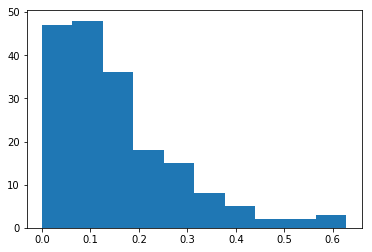

In [53]:
plt.hist(second_list)

In [59]:
np.median(second_list)

0.11974603112519899

(array([ 6.,  9., 17., 40., 35., 35., 37., 19.,  6.,  7.]),
 array([0.06986415, 0.06989219, 0.06992023, 0.06994826, 0.0699763 ,
        0.07000434, 0.07003237, 0.07006041, 0.07008845, 0.07011648,
        0.07014452]),
 <a list of 10 Patch objects>)

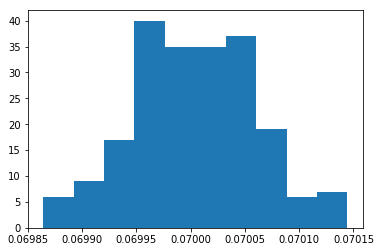

In [54]:
plt.hist(constant_list)

In [60]:
np.median(constant_list)

0.07000243486729973

(array([30.,  1., 33., 10., 11., 25., 10., 23.,  1., 33.]),
 array([0.01986532, 0.02489405, 0.02992279, 0.03495152, 0.03998025,
        0.04500898, 0.05003772, 0.05506645, 0.06009518, 0.06512391,
        0.07015265]),
 <a list of 10 Patch objects>)

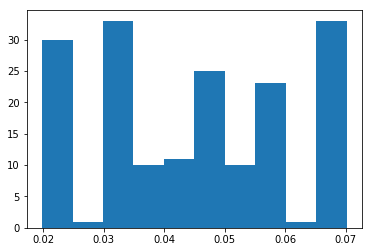

In [55]:
plt.hist(variable_list)

In [61]:
np.median(variable_list)

0.04994699022264106

(array([173.,   5.,   5.,   2.,   5.,   2.,   1.,   1.,   2.,   4.]),
 array([0.        , 0.019971  , 0.03994201, 0.05991301, 0.07988402,
        0.09985502, 0.11982602, 0.13979703, 0.15976803, 0.17973904,
        0.19971004]),
 <a list of 10 Patch objects>)

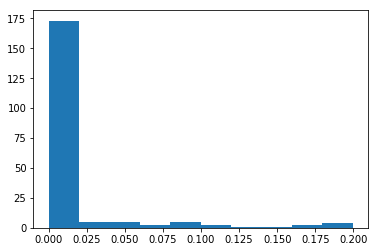

In [56]:
plt.hist(soft_list)

In [62]:
np.median(soft_list)

0.0

(array([146.,  28.,   4.,  14.,   5.,   2.,   2.,   1.,   0.,   1.]),
 array([0.        , 0.05208478, 0.10416956, 0.15625434, 0.20833912,
        0.26042391, 0.31250869, 0.36459347, 0.41667825, 0.46876303,
        0.52084781]),
 <a list of 10 Patch objects>)

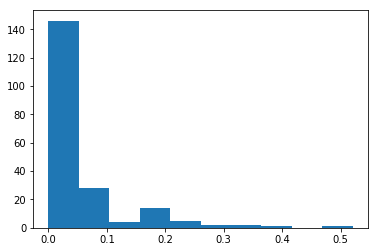

In [57]:
plt.hist(mixed_list)

In [63]:
np.median(mixed_list)

0.012244897959183673